In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

In [2]:
null = Binomial(30, 1/2)

Binomial{Float64}(n=30, p=0.5)

In [3]:
pdf(null, 24)

0.0005529960617423054

In [4]:
ccdf(null, 24-1)

0.000715453177690508

In [5]:
ccdf(Binomial(30, 0.62), 24-1)

0.02884305606076416

In [6]:
ccdf(Binomial(30, 0.65), 24-1)

0.0585721180777394

In [7]:
pdf(Binomial(6, 1/6), 3)

0.05358367626886136

In [8]:
(cdf(Binomial(6, 1/6), 3), ccdf(Binomial(6, 1/6), 3-1))

(0.9912980109739369, 0.06228566529492457)

In [9]:
safediv(x, y) = ifelse(x == 0, zero(x/y), x/y)

function pvalue_wilson(k, n, p)
    bin = Binomial(n, p)
    μ, σ = mean(bin), std(bin)
    z = safediv(k - μ, σ)
    2ccdf(Normal(), abs(z))
end

function pvalue_clopper_pearson(k, n, p)
    bin = Binomial(n, p)
    min(1, 2cdf(bin, k), 2ccdf(bin, k-1))
end

function pvalue_onetailed_approx(k, n, p; alt = :greater)
    bin = Binomial(n, p)
    μ, σ = mean(bin), std(bin)
    z = safediv(k - μ, σ)
    if alt == :greater
        ccdf(Normal(), z)
    else
        cdf(Normal(), z)
    end
end

function pvalue_onetailed_exact(k, n, p; alt = :greater)
    bin = Binomial(n, p)
    if alt == :greater
        ccdf(bin, k-1)
    else
        cdf(bin, k)
    end
end

function plot_pvalues(; n = 30, k = 21, legend=:topleft)
    @show n, k
    @show pvalue_clopper_pearson(k, n, 0.5)
    @show pvalue_wilson(k, n, 0.5)

    plot(p -> pvalue_clopper_pearson(k, n, p), 0, 1; label="Clopper-Pearson")
    plot!(p -> pvalue_wilson(k, n, p), 0, 1; label="Wilson score", ls=:dot)
    plot!(xtick=0:0.1:1, ytick=0:0.05:1)
    plot!(xguide="parameter p", yguide="P-value")
    title!("binomial data: n = $n,  k = $k"; legend)
end

function plot_onetailed(; n = 30, k = 21, legend=:topleft, alt=:greater)
    @show n, k
    @show alt
    @show pvalue_onetailed_exact(k, n, 0.5; alt)
    @show pvalue_onetailed_approx(k, n, 0.5; alt)

    plot(p -> pvalue_onetailed_exact(k, n, p; alt), 0, 1; label="exact")
    plot!(p -> pvalue_onetailed_approx(k, n, p; alt), 0, 1; label="approx.", ls=:dot)
    plot!(xtick=0:0.1:1, ytick=0:0.05:1)
    plot!(xguide="parameter p", yguide="one-tailed P-value")
    title!("binomial data: n = $n,  k = $k"; legend)
end

plot_onetailed (generic function with 1 method)

(n, k) = (30, 21)
alt = :greater
pvalue_onetailed_exact(k, n, 0.5; alt) = 0.02138697262853383
pvalue_onetailed_approx(k, n, 0.5; alt) = 0.014229868458155286


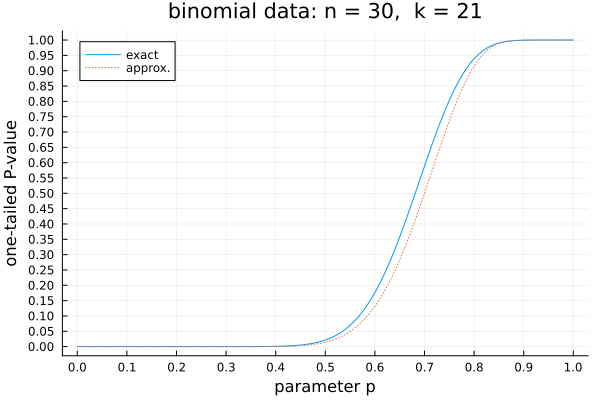

In [10]:
plot_onetailed(; n = 30, k = 21)

(n, k) = (30, 21)
pvalue_clopper_pearson(k, n, 0.5) = 0.04277394525706766
pvalue_wilson(k, n, 0.5) = 0.028459736916310572


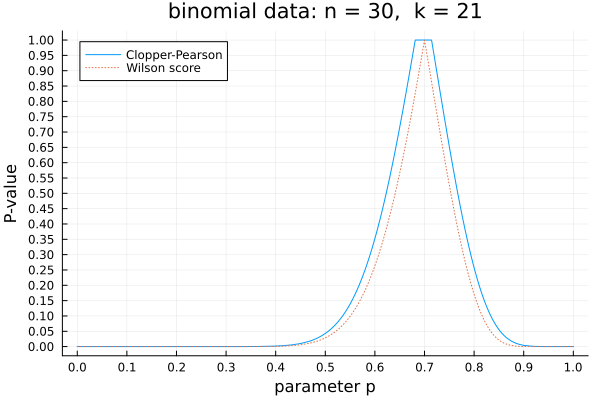

In [11]:
plot_pvalues(; n = 30, k = 21)

(n, k) = (30, 9)
alt = :greater
pvalue_onetailed_exact(k, n, 0.5; alt) = 0.991937599144876
pvalue_onetailed_approx(k, n, 0.5; alt) = 0.9857701315418447


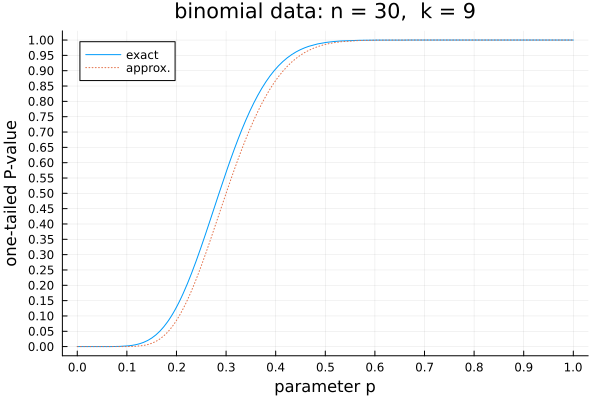

In [12]:
plot_onetailed(; n = 30, k = 9)

(n, k) = (30, 9)
pvalue_clopper_pearson(k, n, 0.5) = 0.04277394525706766
pvalue_wilson(k, n, 0.5) = 0.028459736916310572


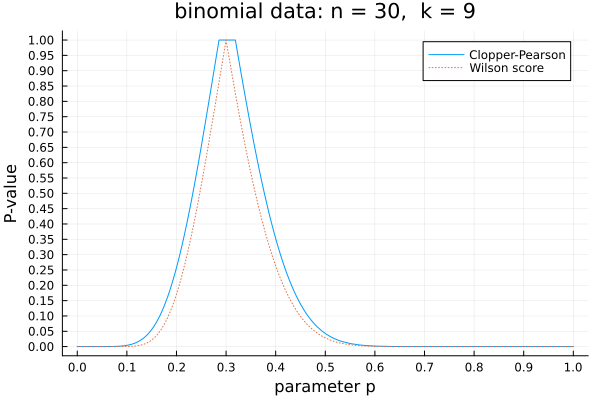

In [13]:
plot_pvalues(; n = 30, k = 9, legend = :topright)

(n, k) = (30, 20)
pvalue_clopper_pearson(k, n, 0.5) = 0.09873714670538897
pvalue_wilson(k, n, 0.5) = 0.06788915486182898


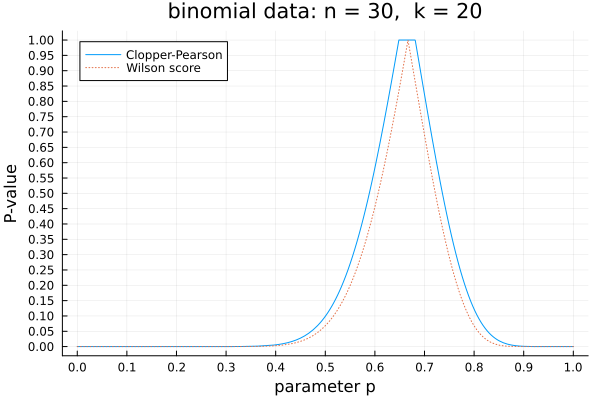

In [14]:
plot_pvalues(; n = 30, k = 20)

(n, k) = (30, 19)
pvalue_clopper_pearson(k, n, 0.5) = 0.2004884220659732
pvalue_wilson(k, n, 0.5) = 0.1441270348160153


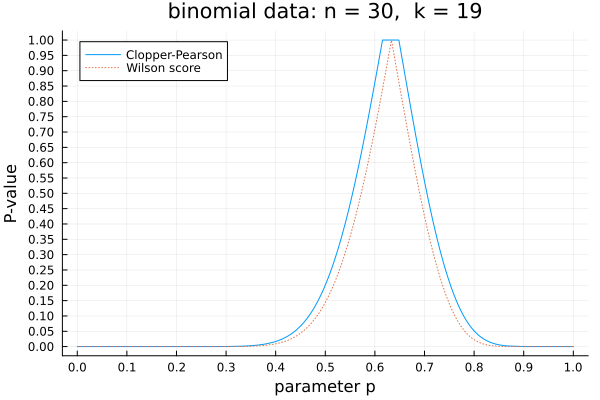

In [15]:
plot_pvalues(; n = 30, k = 19)